# 필요한 라이브러리 Import

In [1]:
from google.colab import drive

drive.mount('/content/drive')

In [2]:
import os,sys

os.chdir('drive/MyDrive/Elice프로젝트/2차프로젝트')

In [3]:
import numpy as np
import pandas as pd

# 연도에 따른 탄소 배출량 파악

In [4]:
data = pd.read_csv("co2_data.csv", index_col=0)

In [5]:
from matplotlib import pyplot as plt

In [6]:
data.columns = data.columns.astype('int')

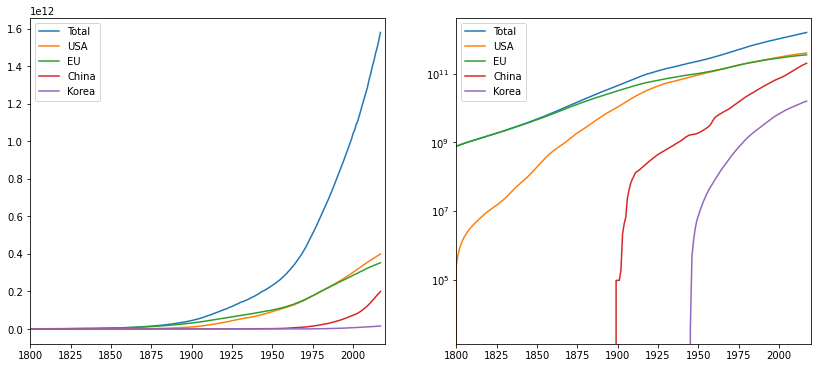

In [7]:
fig,axes = plt.subplots(1,2,figsize=(14,6))

for ax in axes:
  ax.plot(data.loc['World'],label='Total')
  ax.plot(data.loc['United States'],label='USA')
  ax.plot(data.loc['EU-28'],label='EU')
  ax.plot(data.loc['China'],label='China')
  ax.plot(data.loc['South Korea'],label='Korea')
  ax.set_xlim(1800,2020)
  ax.legend()

axes[1].set_yscale('log')
plt.savefig('fig1.png', dpi=300)

## 보통 산업화 이후 탄소 배출량이 급격하게 늘어난 것을 확인할 수 있다
### --> 한국의 경우 1950년 전후로 폭팔적으로 증가하는 모습이 보인다
### --> 6.25 전쟁이 끝난 후 전후 복구 및 1960년부터는 경제개발 5개년 계획

In [8]:
dt = data.transpose()[['World','United States','EU-28','China','South Korea']]

In [9]:
dt.columns = ["World","USA","EU","China","Korea"]

In [10]:
dt.head()

,World,USA,EU,China,Korea
1751,9350528.0,0.0,9350528.0,0.0,0.0
1752,18704720.0,0.0,18704720.0,0.0,0.0
1753,28058912.0,0.0,28058912.0,0.0,0.0
1754,37416768.0,0.0,37416768.0,0.0,0.0
1755,46778288.0,0.0,46778288.0,0.0,0.0


### .to_csv()로 저장 후 -> MySQL

# 국내 해수면 높이의 변화를 파악한다

In [11]:
data1 = pd.read_csv('국내_연평균_해수면높이.txt',index_col=0, encoding='CP949')
data1.columns = ["sea_level", None]
data1.head(5)

,sea_level,NaN
연도,,
1989,0.0,NaN
1990,-0.9,NaN
1991,-0.1,NaN
1992,0.5,NaN
1993,-2.5,NaN


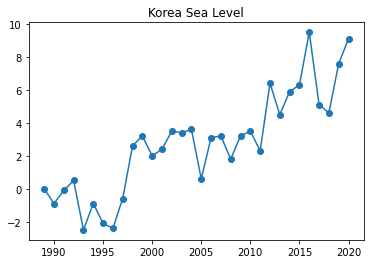

In [12]:
plt.plot(data1,marker='o')
plt.title('Korea Sea ​Level')
plt.savefig('fig2.png', dpi=300)

## 약 30년사이 10cm가량 증가했으며 전체 바다 면적을 고려하면 엄청난 양이 증가했음을 알 수 있다.

In [13]:
data1.drop([None],axis=1).head()

,sea_level
연도,
1989,0.0
1990,-0.9
1991,-0.1
1992,0.5
1993,-2.5


### 변수에 저장 후 to.csv() -> MySQL

# 지구 온난화의 추이도 파악한다

In [14]:
data2 = pd.read_csv('온도_변화량.csv',encoding='cp1252')
data2.head(5)

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


In [15]:
data2 = data2[data2['Element Code'] == 7271] # 온도 변화를 나타내는 코드
data2 = data2[data2['Area Code'].isin([351,117,231,5000,5706])] # 전세계, 미국, 유럽, 중국, 한국 필터링

In [16]:
data2 = data2[data2['Months'] == 'Meteorological year'] # 1년마다 같은 날짜에 측정한 온도 값
data2 = data2.set_index('Area') # 컬럼으로 지정하기 위해서 먼저 인덱스로 지정

In [17]:
data2 = data2.drop(data2.columns[:6], axis=1) # 필요 없는 자료를 컬럼 단위로 버리고
data2.columns = np.arange(1961,2020,1) # 연도별 지정
data2 = data2.transpose() # 행과 열을 교체

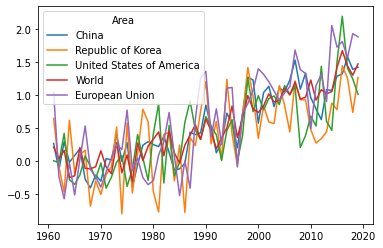

In [18]:
data2.plot()
plt.savefig('fig3.png', dpi=300)

## 대체적으로 전 세계에서 기온 증가가 관측되며, 관측 이후 2도 가량 높게 증가한 곳도 보인다

In [19]:
data2.columns = ["China","Korea","USA","World","EU"]

In [20]:
data2.to_csv("Temperture.cs")

### .to_csv() 후에 SQL로 이동

# 탄소 배출량과 기온 및 해수면의 높이의 상관관계에 대해서 파악한다

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
co2totem = pd.DataFrame([data.loc['South Korea'],data2['Korea']]).transpose().dropna(axis=0) # 탄소 배출량과 온도 변화 상관관계 파악
co2totem.columns = ["co2","tem"]
co2totem['log_co2'] = np.log(co2totem['co2'])
# 온도 변화는 linear 형태로 변하는데에 반해, 탄소 배출량은 로그 스케일로 변화함
 # -> 때문에 그대로 피팅 시 탄소 배출량이 단위가 크기 때문에 weight가 많이 실린다
 # -> 이를 해결하기 위해서 로그 형태를 취해서 완화
co2totem.head()

,co2,tem,log_co2
1961,93093257.0,0.644,18.349112
1962,110354845.0,-0.088,18.519212
1963,131438015.0,-0.476,18.694046
1964,153633169.0,0.616,18.850078
1965,178611478.0,-0.178,19.000723


In [23]:
co2totem = co2totem[co2totem.index >= 1965] # 한국의 경제발전이 본격적으로 이루어진 1965년부터 조사를 해보겠습니다
co2totem.corr(method="spearman") # 스피어맨 상관계수로 변수간의 의존성 파악

,co2,tem,log_co2
co2,1.00000,0.65269,1.00000
tem,0.65269,1.00000,0.65269
log_co2,1.00000,0.65269,1.00000


In [24]:
xx = co2totem['log_co2'].to_numpy().reshape(-1,1)
yy = co2totem['tem'].to_numpy().reshape(-1,1)
tem_model = LinearRegression()

In [25]:
tem_model.fit(xx,yy)
coef = tem_model.coef_[0]
bb = tem_model.intercept_

In [26]:
ten_times_co2 = np.log(co2totem['co2'].max()*10)
xxx = np.linspace(co2totem['log_co2'].min(),ten_times_co2,100)

def reg_1(var):
  return coef*var + bb

text = r"${:.2f}\/x{:.2f}$".format(coef[0],bb[0])

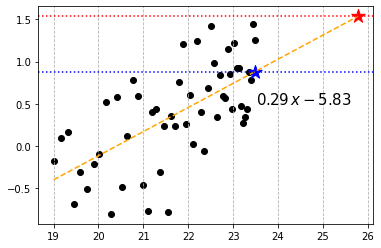

In [27]:
plt.scatter(x='log_co2',y='tem',data=co2totem,color='black')
plt.plot(xxx,reg_1(xxx),color='orange',linestyle='--')
plt.grid(axis='x',linestyle='--')
plt.scatter(co2totem['log_co2'].max(),reg_1(co2totem['log_co2'].max()),s=200,marker='*',color='blue')
plt.axhline(reg_1(co2totem['log_co2'].max()),linestyle=':',color='blue')
plt.scatter(ten_times_co2,reg_1(ten_times_co2),s=200,marker='*',color='red')
plt.axhline(reg_1(ten_times_co2),linestyle=':',color='red')
plt.text(23.5,0.5,text,fontsize=15)
plt.savefig('fig4.png', dpi=300)

## 탄소 배출량이 10배 늘어나면 약 0.5도 가량 상승할 것으로 예상된다
### --> 이는 오히려 긍정적인 전망으로 가속화 되면 10배 상승 시 1.5도 증가할 것으로 예상
(1차 방정식 회귀 분석)

In [28]:
co2tosea = pd.DataFrame([data.loc['South Korea'],data1['sea_level']]).transpose().dropna(axis=0)
co2tosea.columns = ["co2","level"]
co2tosea['log_co2'] = np.log(co2tosea['co2'])
co2tosea.head()

,co2,level,log_co2
1989,2.916336e+09,0.0,21.793594
1990,3.163774e+09,-0.9,21.875032
1991,3.425813e+09,-0.1,21.954605
1992,3.708007e+09,0.5,22.033760
1993,4.029845e+09,-2.5,22.116994


In [29]:
co2tosea.corr(method="spearman")

,co2,level,log_co2
co2,1.000000,0.837565,1.000000
level,0.837565,1.000000,0.837565
log_co2,1.000000,0.837565,1.000000


In [30]:
xx_1 = co2tosea['log_co2'].to_numpy().reshape(-1,1)
yy_1 = co2tosea['level'].to_numpy().reshape(-1,1)
sea_model = LinearRegression()

In [31]:
sea_model.fit(xx_1,yy_1)
coef1 = sea_model.coef_[0]
bb1 = sea_model.intercept_

In [32]:
ten_times_co2 = np.log(co2tosea['co2'].max()*5)
xxx = np.linspace(co2tosea['log_co2'].min(),ten_times_co2,100)

def reg_2(var):
  return coef1*var + bb1

text = r"${:.2f}\/x{:.2f}$".format(coef1[0],bb1[0])

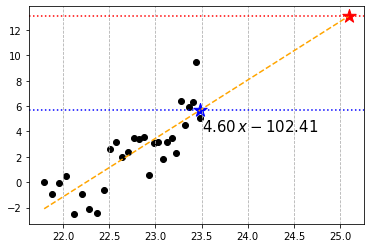

In [33]:
plt.scatter(x='log_co2',y='level',data=co2tosea,color='black')
plt.plot(xxx,reg_2(xxx),color='orange',linestyle='--')
plt.grid(axis='x',linestyle='--')
plt.scatter(co2tosea['log_co2'].max(),reg_2(co2tosea['log_co2'].max()),s=200,marker='*',color='blue')
plt.axhline(reg_2(co2tosea['log_co2'].max()),linestyle=':',color='blue')
plt.scatter(ten_times_co2,reg_2(ten_times_co2),s=200,marker='*',color='red')
plt.axhline(reg_2(ten_times_co2),linestyle=':',color='red')
plt.text(23.5,4,text,fontsize=15)
plt.savefig('fig5.png', dpi=300)

## 탄소배출량이 5배 증가하면 해수면은 6~7cm가량 상승할 것으로 예상된다
### --> 기온과 마찬가지로 가속화 될 가능성이 훨씬 높다
(1차 방정식 회귀분석)